# Hypothesis Testing

In [4]:
import os
import pandas as pd
import pickle
import numpy as np
import warnings
import seaborn as sns
import re
from names_dataset import NameDataset
import time
import datetime 
import import_data
import matplotlib.pyplot as plt
import gender_classification
import calculate_AR
from scipy.stats import ttest_ind
import ttest
from IPython.display import clear_output
from eventstudystatistics import grank, adjBMP

warnings.filterwarnings('ignore')

path = "/Users/admin/Documents/Interd Project/data/"

1. Visualize CAAR

## (i) CAR-mean = 0, Adjusted Standardized Cross-Sectional test based on Kolari and Pynnönen (2010), p. 4002-4003 (parametric test)

Parametric tests assume that your data follow a certain distribution, such as normal, and have specific properties, such as homogeneity of variance. 

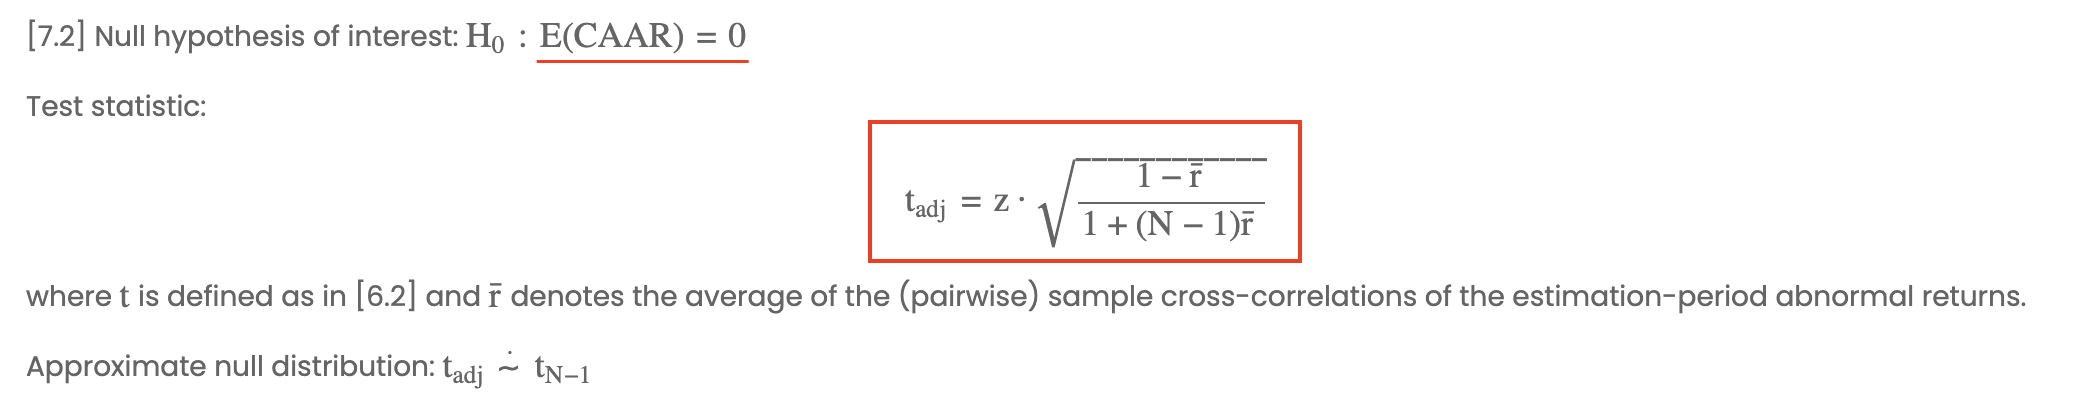

In [2]:
ARs = pd.DataFrame()
for i in range(4):
    part = pd.read_pickle(path+"/ARs/" +f"ARs_{i}.pkl")
    print(part.shape)
    ARs = pd.concat([ARs,part])

ARs = ARs.reset_index(drop=True)

old_shape =ARs.shape[0]
#drop empty df
ARs.dropna(subset="-20",inplace=True)
ARs.dropna(subset="-1",inplace=True)
# need to drop SKYX bcs of extreme outliers
ARs = ARs.drop(ARs[ARs["Ticker"]=="SKYX"].index)

(139907, 51)
(139907, 51)
(139907, 51)
(139905, 51)


In [ ]:
ttest_df = pd.DataFrame(ttest_results, index=pd.MultiIndex.from_tuples(ttest_index, names=["Trade Type", "CAR timeframe"]))
ttest_df.columns = ["Δ CAAR", "p-value"]
print(ttest_df.to_latex(formatters={"name": str.upper},float_format="{:.5f}".format))

In [ ]:
ttest_df

## (ii) CAR-median = 0, Generalized Rank Test based on Kolari and Pynnönen (2011), p.955-956 (non-parametric test)v

Non-parametric tests do not make these assumptions and can be applied to any type of data, such as ordinal or nominal.

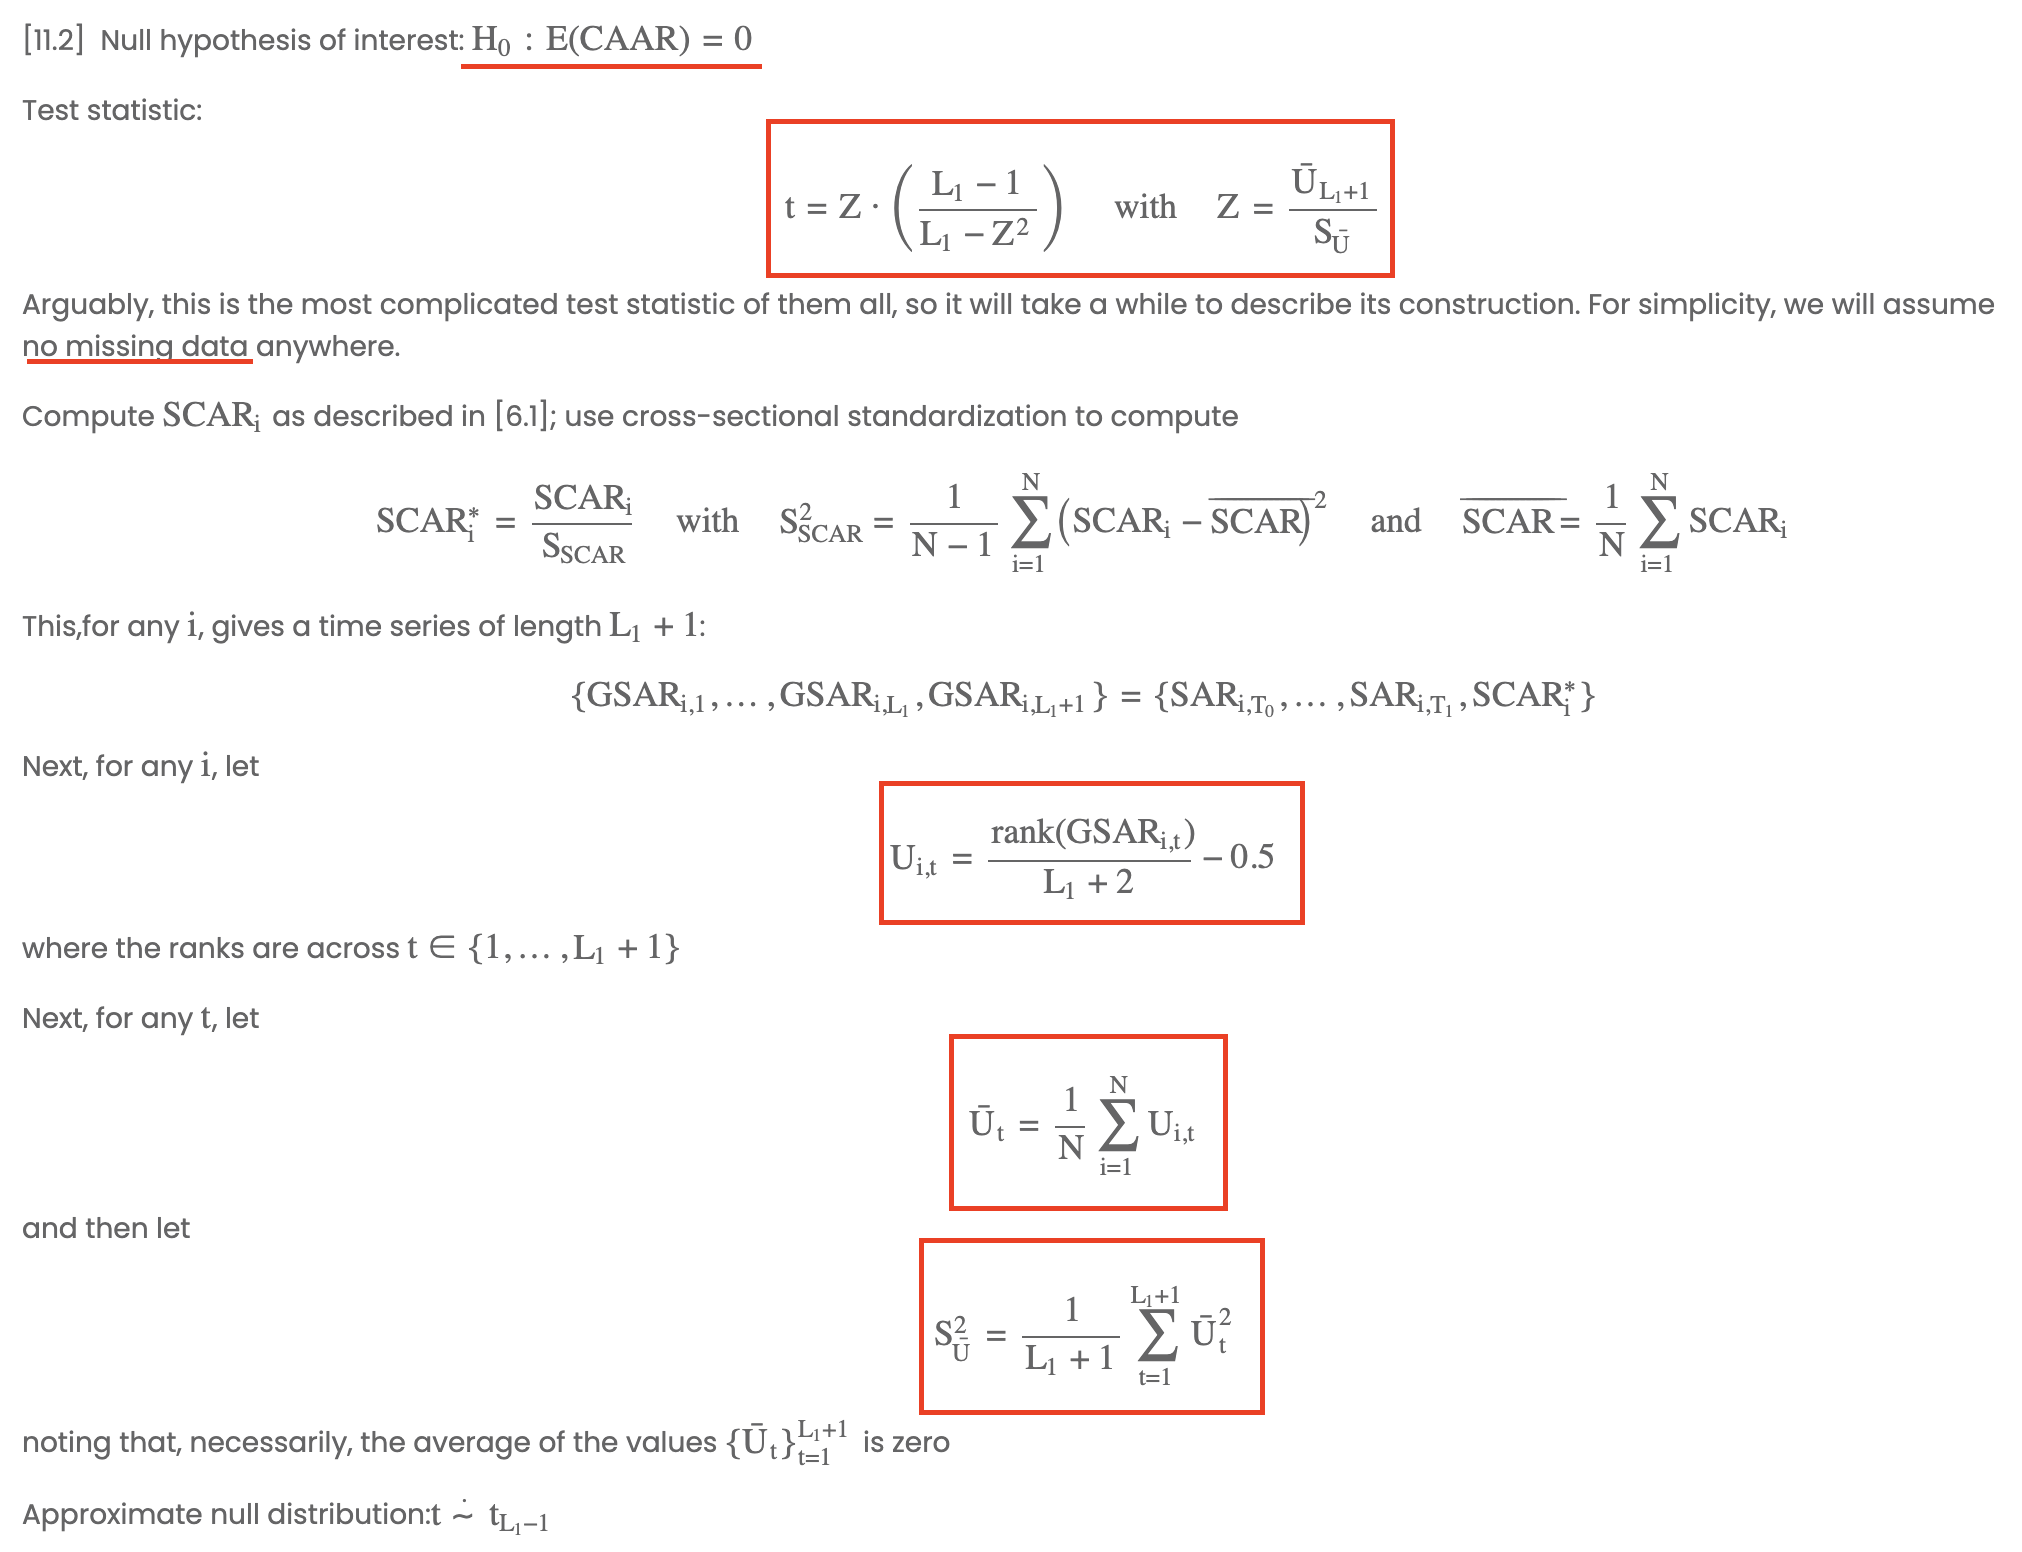

In [ ]:
ttest_results = []
ttest_params = []   
timeframes = [("-20","-1"),("0","5"),("0","10"),("0","20")]
tradetype = ARs["Trade Type"].unique()

for ttype in tradetype: 
    for tf in timeframes:
        
        start = ARs.columns.get_loc(tf[0])
        end = ARs.columns.get_loc(tf[1])
        #print(start,end)
        ARs_subset = ARs[ARs["Trade Type"]==ttype]

        male = ARs_subset[ARs_subset["Gender"]=="Male"]
        CAR_m = male.iloc[:,start:end+1].sum(axis=1)

        female = ARs_subset[ARs_subset["Gender"]=="Female"]
        CAR_f = female.iloc[:,start:end+1].sum(axis=1)
            
        eps = df_eps.loc[:,:,type_,left:right].values
        
        R_market_estimation_window = df_estimation_window_market_return.loc[:,:,type_,left:right].values
        R_market_event_window = df_event_window_market_return.loc[:,:,type_,left:right].values
        grank_result = grank(AR, eps, R_market_estimation_window, R_market_event_window, CAR_period, False)
        adj_grank_result = grank(AR, eps, R_market_estimation_window, R_market_event_window, CAR_period, True)
        adjBMP_result = adjBMP(AR, eps, R_market_estimation_window, R_market_event_window, CAR_period)
        CAAR = AR[:,CAR_period[0]:(CAR_period[1]+1)].sum(axis=1).mean() # scalar value
        test_results.append((CAAR, grank_result.pvalue, grank_result.statistic, adj_grank_result.pvalue, adj_grank_result.statistic, adjBMP_result.pvalue, adjBMP_result.statistic))
        #test_results.append((grank_result.pvalue, grank_result.statistic, adjBMP_result.pvalue, adjBMP_result.statistic))
        test_index.append((per, type_, CAR_period_name))
        

In [ ]:
test_results_df = pd.DataFrame(test_results, index=pd.MultiIndex.from_tuples(test_index, names=["Investigation Period", "Trade Type", "CAR Period"]))
test_results_df.columns = ["CAAR", "GRANK p-value", "GRANK t-statistic", "adj-GRANK p-value", "adj-GRANK statistic", "adjBMP p-value", "adjBMP t-statistic"]
test_results_df.to_pickle(f"data/{NAME}/statistical_tests/GRANK_ADJBMP.pkl")
test_results_df.to_excel(f"data/{NAME}/statistical_tests/statistical_tests_results.xlsx")


### ZUM TESTEN

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 5))

sns.histplot(subs_avg_CAR_m,bins = 100, alpha=0.6,color= "darkred")
sns.histplot(subs_avg_CAR_f,bins = 100, alpha=0.6,color="lawngreen")
#sns.histplot(subs_avg_CAR_f,bins = 100, alpha = 0.5,color="darkorange")
plt.legend(["male", "female"])
plt.xlabel("Mean of CAR")
plt.ylabel("Count")

plt.title(f"Histogram of means of samples of CARs for {ttype} in timeframe {tf}]")
plt.savefig(path+f"/Vis/ttest_{ttype}_{tf}", dpi=600, bbox_inches='tight')

plt.show()   

sign = int(2*(bool(CAAR_diff<0) -0.5)) #  check for the correct side of 0.
p_value = 2*np.mean(sign*np.asarray(subs_diff) > 0) #  times 2 to take into account we are looking at the interesting side always

ttest_results.append((CAAR_diff, p_value))
params.append((ttype, tf))

